In [92]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import math
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression


**Exploring the data**

In [107]:
#Loading the  "Bank_Personal_Loan" Data file

bank_df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')


In [108]:
# No of Rows and columns in the data set
bank_df.shape


(5000, 14)

In [109]:
#Info of each columns: - Total no of rows in each column and data types of each column

bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
#checking if there is any null value in the data set 

bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [110]:
#Viewing the first 5 rows in the data set 

bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [112]:
# rearranging the columns to put the target column at last and 
#catagorical columns at one side and descreat/continous values column one side 



bank_df=bank_df[['ID','Age','Experience','Income','ZIP Code','CCAvg','Mortgage','Family','Education','Securities Account','CD Account','Online','CreditCard','Personal Loan']]

# Viewing the first 10 rows of the data set after columns rearranged

bank_df.head(10)



,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Family,Education,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,1.6,0,4,1,1,0,0,0,0
1,2,45,19,34,90089,1.5,0,3,1,1,0,0,0,0
2,3,39,15,11,94720,1.0,0,1,1,0,0,0,0,0
3,4,35,9,100,94112,2.7,0,1,2,0,0,0,0,0
4,5,35,8,45,91330,1.0,0,4,2,0,0,0,1,0
5,6,37,13,29,92121,0.4,155,4,2,0,0,1,0,0
6,7,53,27,72,91711,1.5,0,2,2,0,0,1,0,0
7,8,50,24,22,93943,0.3,0,1,3,0,0,0,1,0
8,9,35,10,81,90089,0.6,104,3,2,0,0,1,0,0
9,10,34,9,180,93023,8.9,0,1,3,0,0,0,0,1


In [113]:
# Viewing the last 10 rows of the data set after columns rearranged

bank_df.tail(10)

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Family,Education,Securities Account,CD Account,Online,CreditCard,Personal Loan
4990,4991,55,25,58,95023,2.00,219,4,3,0,0,0,1,0
4991,4992,51,25,92,91330,1.90,100,1,2,0,0,0,1,0
4992,4993,30,5,13,90037,0.50,0,4,3,0,0,0,0,0
4993,4994,45,21,218,91801,6.67,0,2,1,0,0,1,0,0
4994,4995,64,40,75,94588,2.00,0,3,3,0,0,1,0,0
4995,4996,29,3,40,92697,1.90,0,1,3,0,0,1,0,0
4996,4997,30,4,15,92037,0.40,85,4,1,0,0,1,0,0
4997,4998,63,39,24,93023,0.30,0,2,3,0,0,0,0,0
4998,4999,65,40,49,90034,0.50,0,3,2,0,0,1,0,0
4999,5000,28,4,83,92612,0.80,0,3,1,0,0,1,1,0


In [8]:
#Details of each columns :-min, max ,mean, std ,count ..

bank_df.describe(include='all').transpose()



,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


**Visualizing the Data in the data set **

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BCAFB08>,
      dtype=object)

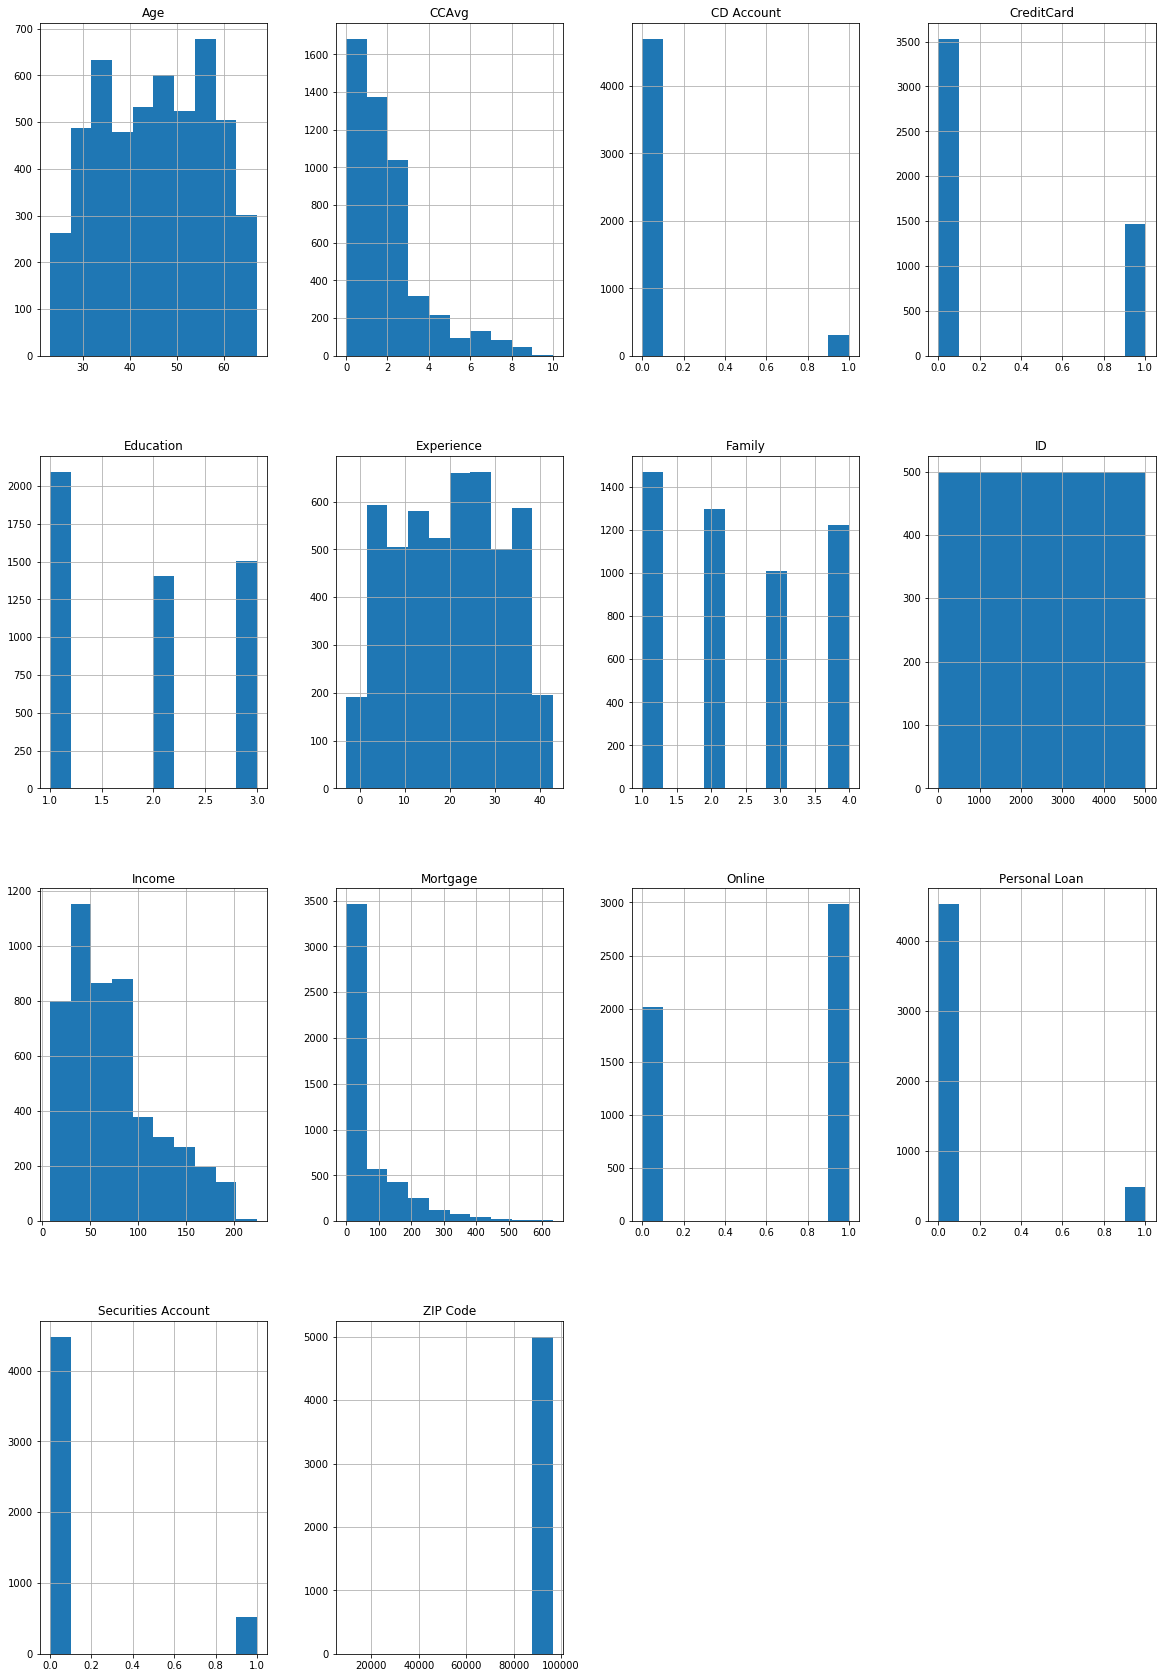

In [9]:
# Histogaram of each column

bank_df.hist(figsize=(20,30))

By seeing the description and the histogram we can conclude that "ID" and "ZIP Code" is not giving any  relavent information 
As the ID is just a incremntal no from 1 to 5000 
And we wont be able to separate the customer based on ZIP code .

Droping the "ID" and "ZIP Code" column


In [161]:
#Drop the not useful columns
bank_df.drop(['ID','ZIP Code'], axis=1, inplace=True)
bank_df.head(10)


,Age,Experience,Income,CCAvg,Mortgage,Family,Education,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,1.6,0,4,1,1,0,0,0,0
1,45,19,34,1.5,0,3,1,1,0,0,0,0
2,39,15,11,1.0,0,1,1,0,0,0,0,0
3,35,9,100,2.7,0,1,2,0,0,0,0,0
4,35,8,45,1.0,0,4,2,0,0,0,1,0
5,37,13,29,0.4,155,4,2,0,0,1,0,0
6,53,27,72,1.5,0,2,2,0,0,1,0,0
7,50,24,22,0.3,0,1,3,0,0,0,1,0
8,35,10,81,0.6,104,3,2,0,0,1,0,0
9,34,9,180,8.9,0,1,3,0,0,0,0,1


In [163]:
bank_corr=bank_df.corr()
bank_corr

,Age,Experience,Income,CCAvg,Mortgage,Family,Education,Securities Account,CD Account,Online,CreditCard,Personal Loan
Age,1.000000,0.994215,-0.055269,-0.052012,-0.012539,-0.046418,0.041334,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,0.994215,1.000000,-0.046574,-0.050077,-0.010582,-0.052563,0.013152,-0.001232,0.010353,0.013898,0.008967,-0.007413
Income,-0.055269,-0.046574,1.000000,0.645984,0.206806,-0.157501,-0.187524,-0.002616,0.169738,0.014206,-0.002385,0.502462
CCAvg,-0.052012,-0.050077,0.645984,1.000000,0.109905,-0.109275,-0.136124,0.015086,0.136534,-0.003611,-0.006689,0.366889
Mortgage,-0.012539,-0.010582,0.206806,0.109905,1.000000,-0.020445,-0.033327,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Family,-0.046418,-0.052563,-0.157501,-0.109275,-0.020445,1.000000,0.064929,0.019994,0.014110,0.010354,0.011588,0.061367
Education,0.041334,0.013152,-0.187524,-0.136124,-0.033327,0.064929,1.000000,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Securities Account,-0.000436,-0.001232,-0.002616,0.015086,-0.005411,0.019994,-0.010812,1.000000,0.317034,0.012627,-0.015028,0.021954
CD Account,0.008043,0.010353,0.169738,0.136534,0.089311,0.014110,0.013934,0.317034,1.000000,0.175880,0.278644,0.316355
Online,0.013702,0.013898,0.014206,-0.003611,-0.005995,0.010354,-0.015004,0.012627,0.175880,1.000000,0.004210,0.006278


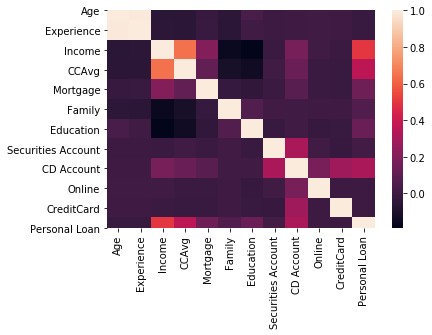

In [164]:
sns.heatmap(bank_corr)

From the Heat map and correlation table we can conclude that Experience and Age is positively correlated .Stronge corelation exist betwen "Age and Experience".
There is slight correlation exist between "Income" and "CCAvg"

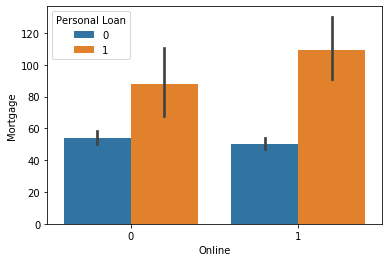

In [162]:
sns.barplot(bank_df["Online"],bank_df["Mortgage"],hue=bank_df["Personal Loan"])

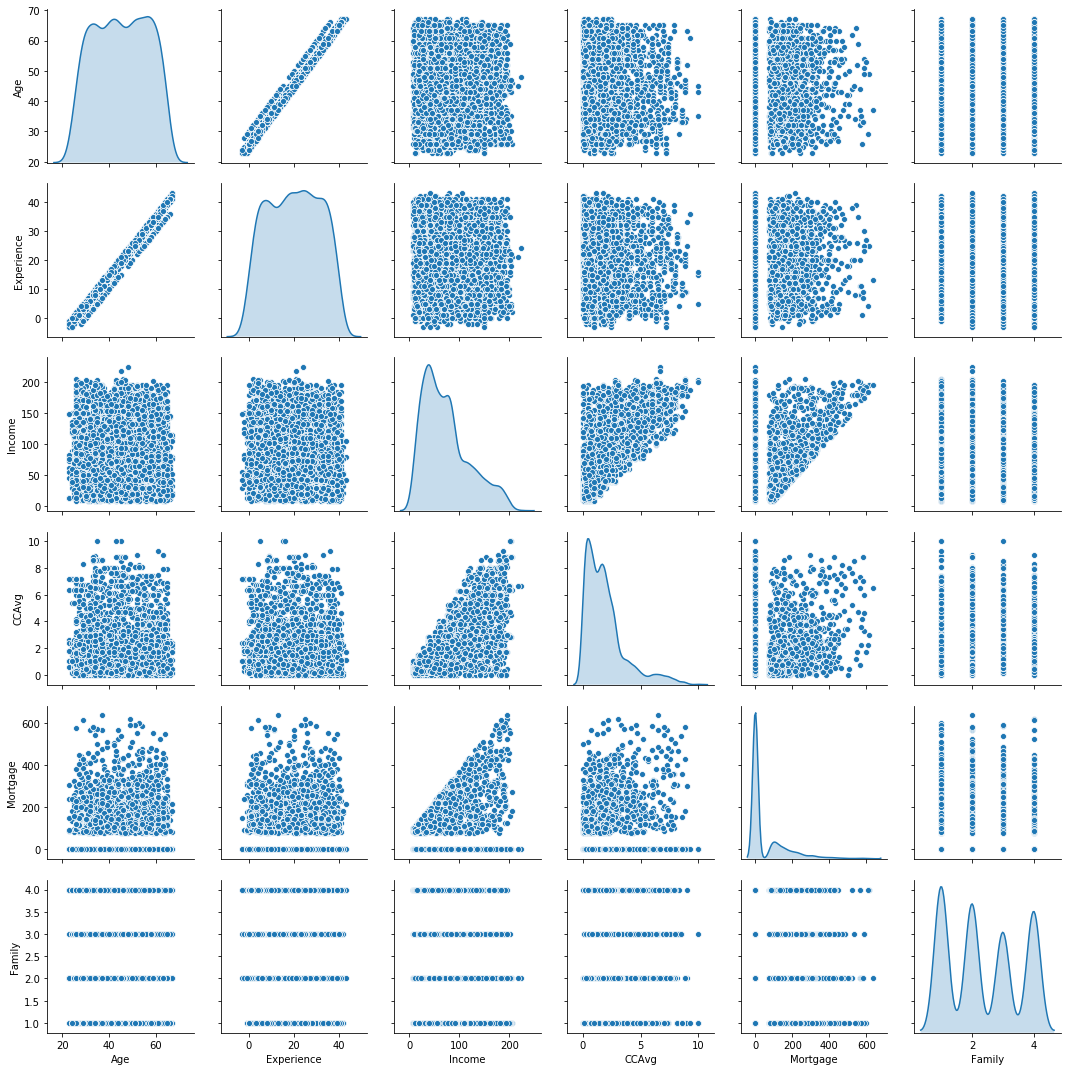

In [13]:
bank_attr = bank_df.iloc[:, 0:6]
sns.pairplot(bank_attr,diag_kind='kde')

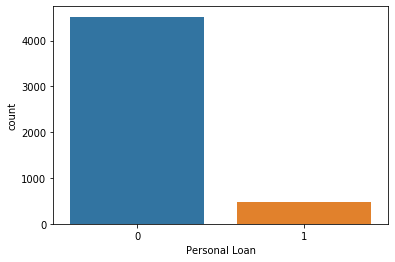

In [14]:
sns.countplot(bank_df['Personal Loan'])


-Customer  who uses online banking are more likey to take the Personal Loan.
-Very Few Customers has CD Account and Securities account with the Bank

In [15]:
#calculating the no of customer who took personal loan  and 
#total no of customer  who didnt took the personal loan  from the total of 5000 total customer  observations

n_loan_true = len(bank_df.loc[bank_df['Personal Loan'] == 1])
n_loan_false = len(bank_df.loc[bank_df['Personal Loan'] == 0])


print("Number of customers who took the personal Loans are: {0} ({1:2.2f}%)".format(n_loan_true, (n_loan_true / (n_loan_true + n_loan_false)) * 100 ))
print("Number of customers who didnt took   the personal Loans are: {0} ({1:2.2f}%)".format(n_loan_false, (n_loan_false / (n_loan_true + n_loan_false)) * 100))

Number of customers who took the personal Loans are: 480 (9.60%)
Number of customers who didnt took   the personal Loans are: 4520 (90.40%)


Data Slicing

In [16]:
X = bank_df.drop("Personal Loan",axis=1)     #  feature columns
Y = bank_df["Personal Loan"]                # target Column

In [174]:
#Split the data into training and test data 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


In [176]:
#Print the % of data in Training set and Test set

print("{0:0.2f}% data is in training set".format((len(x_train)/len(bank_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bank_df.index)) * 100))

print()

#Printing no  of rows and columns in Training and Test set

print("No of Rows and columns in the training data ",x_train.shape)
print("No of Rows and columns in the test data",x_test.shape)

70.00% data is in training set
30.00% data is in test set

No of Rows and columns in the training data  (3500, 11)
No of Rows and columns in the test data (1500, 11)


Check the no of customer accepted personal load in training set and test set

In [19]:
print("Personal Loan 1 Values  in Original data frame   : {0} ({1:0.2f}%)".format(len(bank_df.loc[bank_df['Personal Loan'] == 1]), (len(bank_df.loc[bank_df['Personal Loan'] == 1])/len(bank_df.index)) * 100))
print("Personal Loan 0  Values in Original data frame  : {0} ({1:0.2f}%)".format(len(bank_df.loc[bank_df['Personal Loan'] == 0]), (len(bank_df.loc[bank_df['Personal Loan'] == 0])/len(bank_df.index)) * 100))
print("")
print("Personal Loan 1  Values in Training set     : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Personal Loan 0  Values in Training set   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Personal Loan 1  Values in Test Set      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Personal Loan 0  Values in Test Set        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Personal Loan 1 Values  in Original data frame   : 480 (9.60%)
Personal Loan 0  Values in Original data frame  : 4520 (90.40%)

Personal Loan 1  Values in Training set     : 331 (9.46%)
Personal Loan 0  Values in Training set   : 3169 (90.54%)

Personal Loan 1  Values in Test Set      : 149 (9.93%)
Personal Loan 0  Values in Test Set        : 1351 (90.07%)



From this we can say that the data is equally distributed and True and flase value are equal in training and Test data set 

**Logistic Regression Model**

In [20]:
#fit the model in training set

lg_model = LogisticRegression(solver="liblinear")
lg_model.fit(x_train, y_train)

y_predict = lg_model.predict(x_test)


coefficient_df = pd.DataFrame(lg_model.coef_)
coefficient_df['intercept'] = lg_model.intercept_
print(coefficient_df)

         0         1         2         3         4        5         6  \
0 -0.40654  0.405141  0.049153  0.162395  0.000795  0.65172  1.656217   

         7         8         9        10  intercept  
0 -0.90684  3.265738 -0.575831 -1.008859  -2.373893  


In [223]:
model_score = lg_model.score(x_test, y_test)
print(model_score)

0.9453333333333334


In [224]:
# predicting  the response
y_predict = lg_model.predict(x_test)

#printing the Confusion matrix  of Logistic regression
print("confusion_matrix of Logistic Regression Model")
print(confusion_matrix(y_test,y_predict))

confusion_matrix of Logistic Regression Model
[[1333   18]
 [  64   85]]


In [225]:
#*Evaluating  the Logistic Model Accuracy

print("Accuracy:",accuracy_score(y_test, y_predict))

print("Recall:",recall_score(y_test, y_predict))

print("precision:",precision_score(y_test, y_predict))

print("F1 Score:",f1_score(y_test,y_predict))

Accuracy: 0.9453333333333334
Recall: 0.5704697986577181
precision: 0.8252427184466019
F1 Score: 0.6746031746031745


**Bernoulli Naive Bayes Classification model**

Most of the data fields are binary in nature so selected Bernoulli Naive bayes .For Gausion Naive based the feature data should be contionus in nature and if we want to check the frequecny and the occurance of then data then we should opt for Multinomial data . 

In [49]:
#fit the model in training set

bernoulli_model = BernoulliNB()
bernoulli_model .fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [106]:
Y_Brnbpred = bernoulli_model.predict(x_test)

#Print the Confusion metrix of Bernoulli Naive Bayes  model
print("confusion_matrix of Bernoulli Naive bayes")
print(confusion_matrix(y_test,Y_Brnbpred))

confusion_matrix of Bernoulli Naive bayes
[[1316   35]
 [ 126   23]]


In [102]:
#Evaluating the Bernoulli Naive Bayes Model

print("Accuracy:",accuracy_score(y_test, Y_Brnbpred))

print("Recall:",recall_score(y_test, Y_Brnbpred))

print("precision:",precision_score(y_test, Y_Brnbpred))

print("F1 Score:",f1_score(y_test,Y_Brnbpred))

Accuracy: 0.8926666666666667
Recall: 0.15436241610738255
precision: 0.39655172413793105
F1 Score: 0.2222222222222222


**KNN Classification Model**

In [79]:
k_value = math.sqrt(len(y_test))
print(k_value)
# to make the K value odd substratc one 
k= k_value-1
print(k)

# instantiate learning model (k = 37)
#fit the model in training set

knn_model = KNeighborsClassifier(n_neighbors = 37)

knn_model.fit(x_train, y_train)



38.72983346207417
37.72983346207417


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

In [80]:
# predict the response
y_Knnpred = knn_model.predict(x_test)


In [104]:
#Print the Confusion metrix of KNN model

print("confusion_matrix of KNN Model")
print(confusion_matrix(y_test,y_Knnpred))

confusion_matrix of KNN Model
[[1333   18]
 [ 116   33]]


In [82]:
#Evaluating the KNN Model

print("Accuracy:",accuracy_score(y_test, y_Knnpred))

print("Recall:",recall_score(y_test, y_Knnpred))

print("precision:",precision_score(y_test, y_Knnpred))

print("F1 Score:",f1_score(y_test,y_Knnpred))

Accuracy: 0.9106666666666666
Recall: 0.2214765100671141
precision: 0.6470588235294118
F1 Score: 0.33


**SVM Model**

In [93]:
svm_model = svm.SVC(gamma=0.025, C=3)  

In [94]:
#fit the model in training set
svm_model.fit(x_train , y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [97]:
# predict the response
y_svmpred = svm_model.predict(x_test)

In [103]:
#print confusion metrix of SVM Model

print("confusion_matrix of SVM Model")
print(confusion_matrix(y_test,y_svmpred))

confusion_matrix of SVM Model
[[1340   11]
 [  98   51]]


In [98]:
#Evaluating the SVM Model

print("Accuracy:",accuracy_score(y_test, y_svmpred))

print("Recall:",recall_score(y_test, y_svmpred))

print("precision:",precision_score(y_test, y_svmpred))

print("F1 Score:",f1_score(y_test,y_svmpred))


Accuracy: 0.9273333333333333
Recall: 0.3422818791946309
precision: 0.8225806451612904
F1 Score: 0.48341232227488157


From all the  Matrix of different Model we can say that "Logistic Regression" is best model for this given data set 
as the Accuracy ,Precision, recall and F1 score is high for Logistic regression


